In [105]:
import subprocess
import pandas as pd

In [113]:
def run_process(command):
    p = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    for line in p.stdout.readlines():
        print(line.strip())
        
    retval = p.wait()

In [107]:
# set filters
MAF='0.1' # --maf
QUAL='30' # --qual-threshold
# MIN_DEPTH='10'
# MAX_DEPTH='50'

In [116]:
check_files = ['cd /datasets/dsc180a-wi20-public/Genome/vcf; ls']

copy_test_file = 'cp /datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz* ./vcf'

# vcf_to_bcf = '''for chr in {1..22}; do
#     bcftools norm -m-any --check-ref w -f human_g1k_v37.fasta \
#       ALL.chr'${chr}'.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz | \

#       bcftools annotate -x ID -I +'%CHROM:%POS:%REF:%ALT' | \

#         bcftools norm -Ob --rm-dup both \
#           > ALL.chr'${chr}'.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.bcf ;

#     bcftools index ALL.chr'${chr}'.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.bcf ;
# done'''


fp = './vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
out_path = './vcf/filtered/chr22'

args1 = ['plink2', '--vcf', fp, '--maf', MAF, '--qual-threshold', QUAL, '--indep-pairwise', '50', '10', '0.1', '--out', out_path]

prune_fp = './vcf/filtered/chr22.prune.in'

outdir = 'chr22pc'

args2 = ['plink2', '--vcf', fp, '--extract', prune_fp, '--make-bed', '--pca', '--out', outdir]

# run_process(check_files)
# run_process(copy_test_file)
run_process(check_files)

b'ALL.chr10.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b'ALL.chr10.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.tbi'
b'ALL.chr11.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b'ALL.chr11.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.tbi'
b'ALL.chr12.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b'ALL.chr12.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.tbi'
b'ALL.chr13.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b'ALL.chr13.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.tbi'
b'ALL.chr14.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b'ALL.chr14.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.tbi'
b'ALL.chr15.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b'ALL.chr15.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.tbi'
b'ALL.chr16.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'
b'ALL.chr16.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz.tbi'
b'ALL.chr17.shapeit2_integrated_v1

In [120]:
eigval = pd.read_table('chr22pc.eigenval', header = None)
eigval.head()

,0
0,47.70210
1,15.07800
2,6.67823
3,5.51712
4,4.15407


In [121]:
outdir = 'chr22pc'

eigvec = pd.read_table(outdir + '.eigenvec', delimiter=' ', header = None)
eigvec.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,HG00096,HG00096,-0.010348,-0.028370,-0.019065,-0.026186,-0.000741,0.004028,-0.002879,0.002679,...,-0.001271,0.000738,0.000042,-0.004292,-0.000749,-0.001017,-0.000754,-0.000209,-0.001986,-0.001085
1,HG00097,HG00097,-0.011823,-0.022700,-0.009771,-0.013392,-0.000317,0.001267,0.001583,0.002581,...,-0.001683,-0.002614,-0.000508,0.000985,0.001520,0.001406,0.000146,0.002218,-0.000569,0.002309
2,HG00099,HG00099,-0.010487,-0.025631,-0.007195,-0.015820,-0.001671,-0.001202,-0.000854,0.000985,...,0.000091,0.001380,0.000226,0.000461,0.000547,-0.003657,-0.000321,-0.000967,-0.003500,0.002758
3,HG00100,HG00100,-0.010383,-0.027250,-0.019007,-0.025723,-0.000361,-0.000198,0.000165,0.002307,...,-0.000564,-0.000433,-0.000382,0.000687,0.000964,-0.001513,0.000482,-0.000296,-0.003254,0.003257
4,HG00101,HG00101,-0.010356,-0.021877,-0.015228,-0.010931,0.000424,-0.000435,-0.000892,0.000529,...,0.000044,0.002492,-0.000198,-0.000737,-0.001300,0.001176,-0.001630,-0.000911,-0.000178,-0.002408


In [85]:
to_plot = eigvec.copy()
to_plot[0] = to_plot[0].apply(lambda x: x[:2])
to_plot[1] = to_plot[1].apply(lambda x: x[:2])

Text(0.5, 0, 'PC 1')

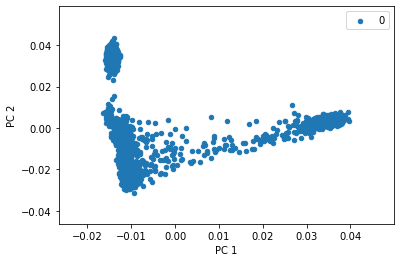

In [117]:
ax = to_plot.plot.scatter(x=2, y=3, label='0')


ax.set_ylabel('PC 2')
ax.set_xlabel('PC 1')

Text(0.5, 1.0, 'Percent Variance Explained by PC')

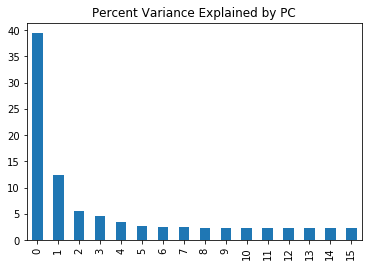

In [56]:
perc_var = (eigval[:16])/eigval[0].sum()*100

ax = perc_var.plot(kind='bar', legend=False)
ax.set_title('Percent Variance Explained by PC')